## 1. Dataset Preparation

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
# Explore the dataset shape (rows, columns) and column names. 
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Get summary statistics of the dataset
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
# Display information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje


## 2. Data Cleaning & Preprocessing

In [6]:
# Check for missing values in each column
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
# Handle missing values by replacing them with the most frequent value (mode)
df['Teacher_Quality'].fillna(df["Parental_Education_Level"].mode()[0],inplace=True)
df['Parental_Education_Level'].fillna(df['Teacher_Quality'].mode()[0],inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0],inplace=True)

C:\Users\youse\AppData\Local\Temp\ipykernel_21564\1756405722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df["Parental_Education_Level"].mode()[0],inplace=True)
C:\Users\youse\AppData\Local\Temp\ipykernel_21564\1756405722.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [8]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [9]:
# Check if there are any duplicate rows in the dataset
# Returns True if at least one duplicate exists, otherwise False
df.duplicated().any()

np.False_

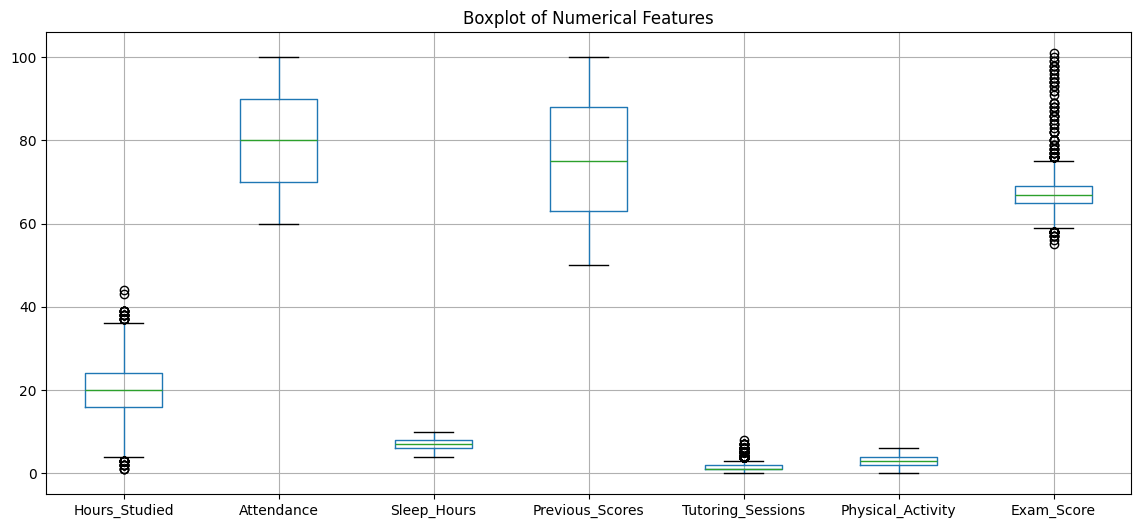

In [10]:
# Draw a boxplot for all numerical columns to check for potential outliers
plt.figure(figsize=(14, 6))
df.boxplot(figsize=(14, 6))
plt.title("Boxplot of Numerical Features")
plt.show()

In [11]:
# Handle outliers in the 'Hours_Studied' column by capping values outside the IQR range
Q1 = df["Hours_Studied"].quantile(0.25)
Q3 = df["Hours_Studied"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df["Hours_Studied"] = np.where(df["Hours_Studied"] > upper_limit, upper_limit, np.where(df["Hours_Studied"] < lower_limit, lower_limit, df["Hours_Studied"]))

In [12]:
# Handle outliers in the 'Tutoring_Sessions' column by capping values outside the IQR range
Q1 = df["Tutoring_Sessions"].quantile(0.25)
Q3 = df["Tutoring_Sessions"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df["Tutoring_Sessions"] = np.where(df["Tutoring_Sessions"] > upper_limit, upper_limit, np.where(df["Tutoring_Sessions"] < lower_limit, lower_limit, df["Tutoring_Sessions"]))

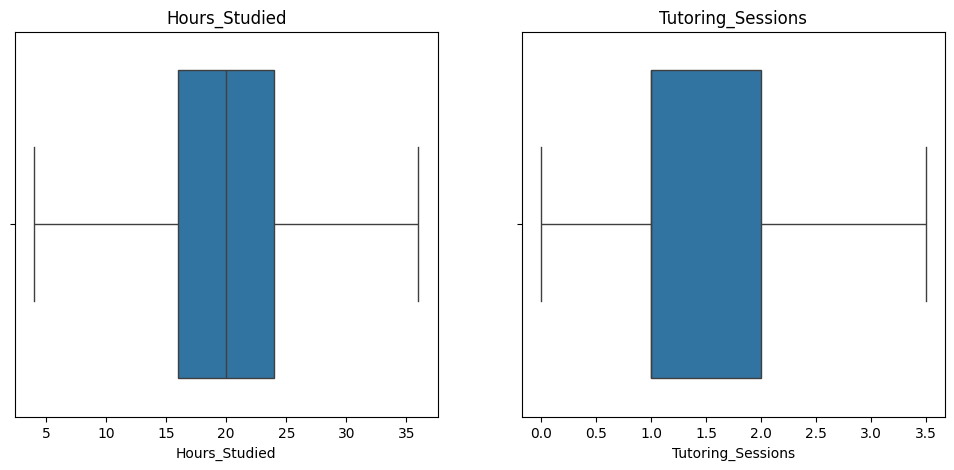

In [13]:
# Checking for remaining outliers after capping using boxplots
plt.figure(figsize=(12,5))

# Boxplot for 'Hours_Studied'
plt.subplot(1,2,1)
sns.boxplot(x=df['Hours_Studied'])
plt.title("Hours_Studied")

# Boxplot for 'Tutoring_Sessions'
plt.subplot(1,2,2)
sns.boxplot(x=df['Tutoring_Sessions'])
plt.title("Tutoring_Sessions")

plt.show()

## 3. Data Visualization (Exploratory Data Analysis – EDA)

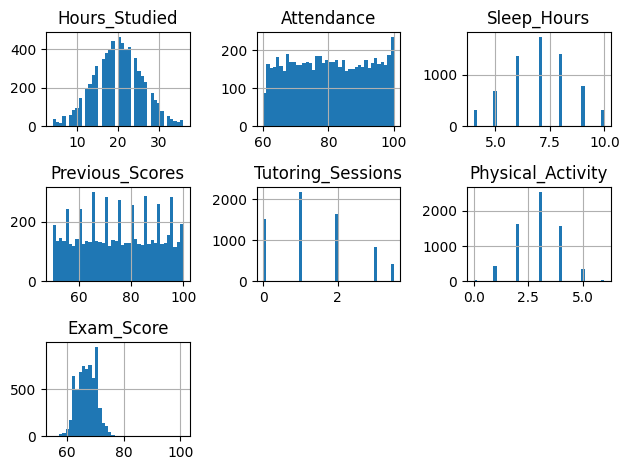

In [14]:
# Plot histograms for all numerical columns to check their distributions
df.hist(bins=40)
plt.tight_layout()
plt.show()

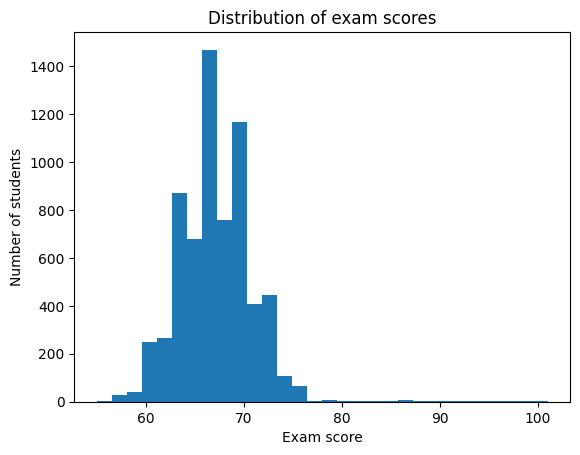

In [15]:
# Plot histogram for the 'Exam_Score' column

plt.hist(x=df["Exam_Score"],bins=30)
plt.title("Distribution of exam scores")
plt.xlabel("Exam score")
plt.ylabel("Number of students")
plt.show()

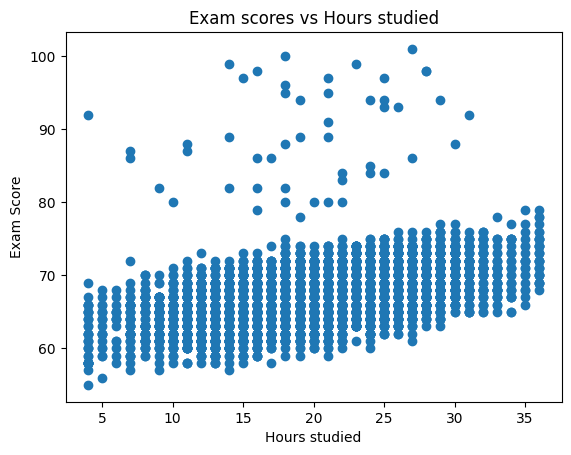

In [16]:
# Scatterplot to visualize the relationship between study time and exam scores
plt.scatter(x=df["Hours_Studied"],y=df["Exam_Score"])
plt.title("Exam scores vs Hours studied")
plt.ylabel("Exam Score")
plt.xlabel("Hours studied")
plt.show()

## 4. Feature Engineering

In [17]:
# Encode categorical variables into numeric values

# Ordinal encoding
df["Parental_Involvement"] = df["Parental_Involvement"].map({"Low": 0, "Medium": 1 ,"High":2})
df["Access_to_Resources"] = df["Access_to_Resources"].map({"Low": 0, "Medium": 1 ,"High":2})
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({"No": 0, "Yes": 1})
df["Motivation_Level"] = df["Motivation_Level"].map({"Low": 0, "Medium": 1 ,"High":2})
df["Internet_Access"] = df["Internet_Access"].map({"No": 0, "Yes": 1})
df["Family_Income"] = df["Family_Income"].map({"Low": 0, "Low": 1 ,"Medium":2, "High":3})
df["Teacher_Quality"] = df["Teacher_Quality"].map({"High School": 0, "Low":1, "Medium": 2 , "High":3})
df["Learning_Disabilities"] = df["Learning_Disabilities"].map({"No": 0, "Yes": 1}) 
df["Peer_Influence"] = df["Peer_Influence"].map({"Negative": 0, "Neutral": 1 ,"Positive":2})
df["Distance_from_Home"] = df["Distance_from_Home"].map({"Near": 0, "Moderate": 1 ,"Far":2})

# One-Hot Encoding for non-ordinal categorical variables
df = pd.get_dummies(df, columns=["Parental_Education_Level","School_Type","Gender"], drop_first=True)

In [18]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Exam_Score,Parental_Education_Level_High School,Parental_Education_Level_Medium,Parental_Education_Level_Postgraduate,School_Type_Public,Gender_Male
0,23.0,84,0,2,0,7,73,0,1,0.0,...,2,3,0,0,67,True,False,False,True,True
1,19.0,64,0,1,0,8,59,0,1,2.0,...,0,4,0,1,61,False,False,False,True,False
2,24.0,98,1,1,1,7,91,1,1,2.0,...,1,4,0,0,74,False,False,True,True,True
3,29.0,89,0,1,1,8,98,1,1,1.0,...,0,4,0,1,71,True,False,False,True,True
4,19.0,92,1,1,1,6,65,1,1,3.0,...,1,4,0,0,70,False,False,False,True,False


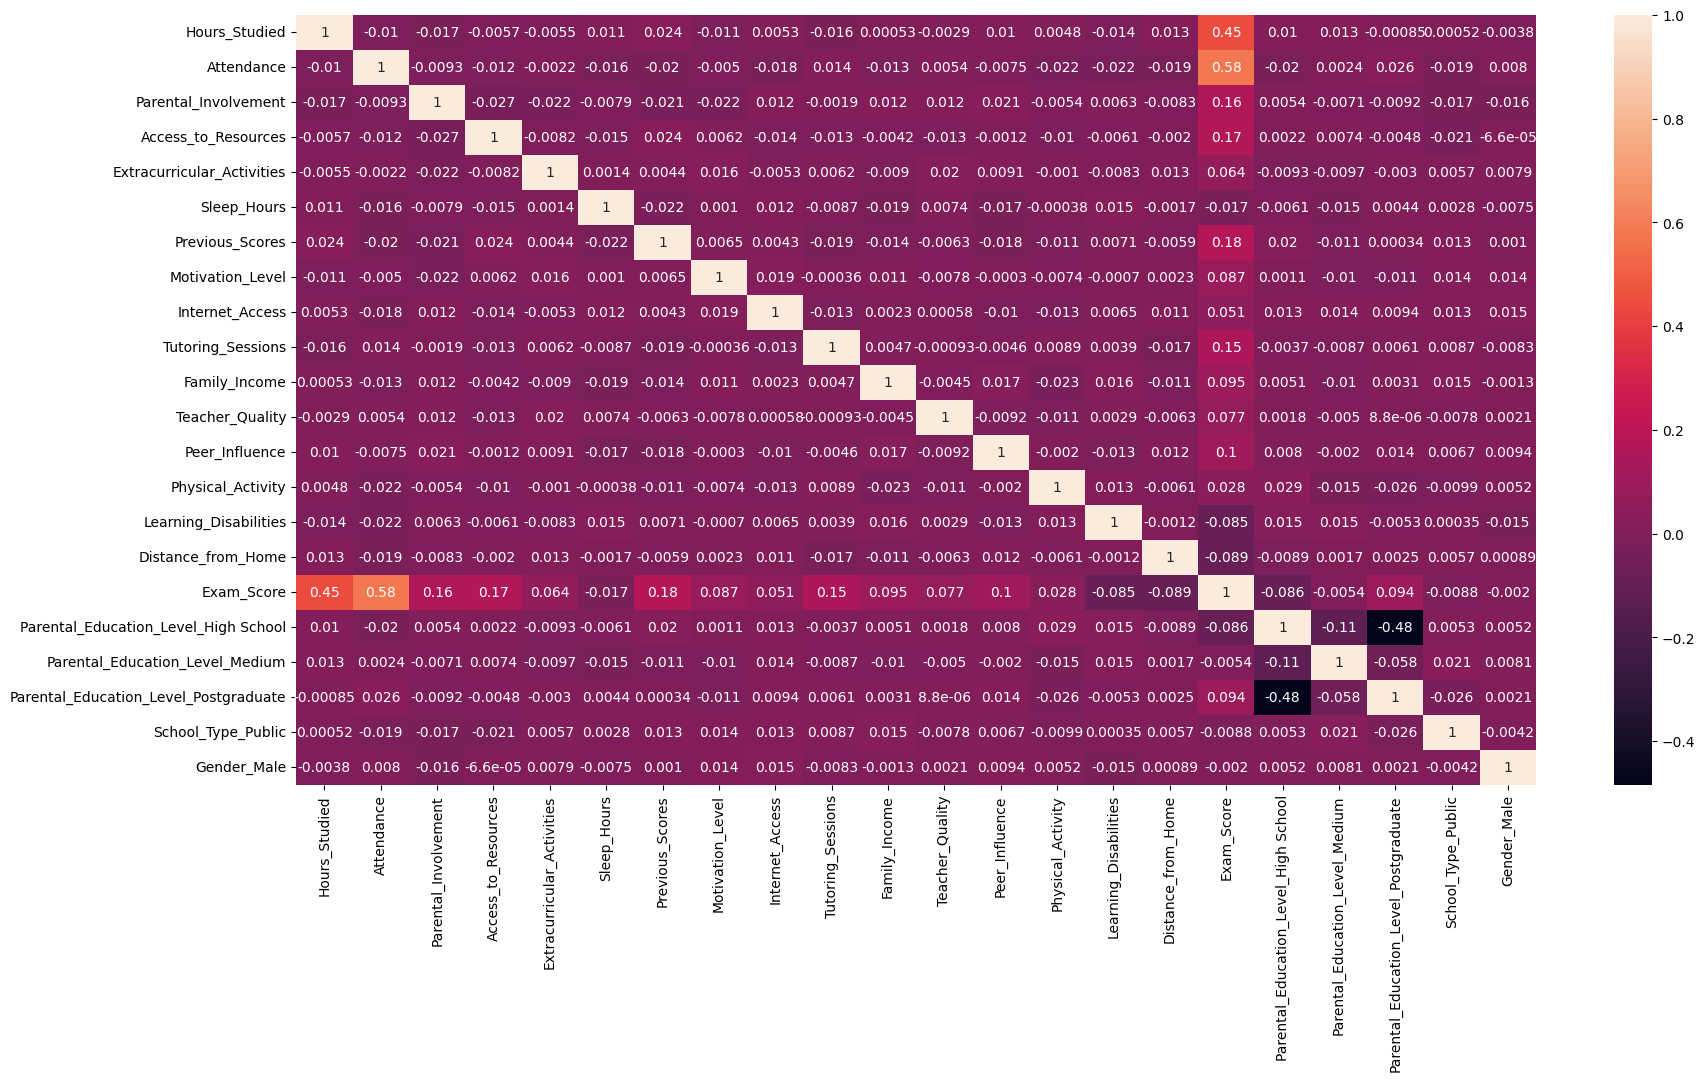

In [19]:
# Plot a heatmap to visualize correlations between numerical features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6607 non-null   float64
 1   Attendance                             6607 non-null   int64  
 2   Parental_Involvement                   6607 non-null   int64  
 3   Access_to_Resources                    6607 non-null   int64  
 4   Extracurricular_Activities             6607 non-null   int64  
 5   Sleep_Hours                            6607 non-null   int64  
 6   Previous_Scores                        6607 non-null   int64  
 7   Motivation_Level                       6607 non-null   int64  
 8   Internet_Access                        6607 non-null   int64  
 9   Tutoring_Sessions                      6607 non-null   float64
 10  Family_Income                          6607 non-null   int64  
 11  Teac

In [21]:
# Drop less important or redundant features from the dataset
df.drop(columns=["Gender_Male","School_Type_Public","Peer_Influence","Physical_Activity","Internet_Access","Extracurricular_Activities"],inplace=True)

In [22]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Learning_Disabilities,Distance_from_Home,Exam_Score,Parental_Education_Level_High School,Parental_Education_Level_Medium,Parental_Education_Level_Postgraduate
0,23.0,84,0,2,7,73,0,0.0,1,2,0,0,67,True,False,False
1,19.0,64,0,1,8,59,0,2.0,2,2,0,1,61,False,False,False
2,24.0,98,1,1,7,91,1,2.0,2,2,0,0,74,False,False,True
3,29.0,89,0,1,8,98,1,1.0,2,2,0,1,71,True,False,False
4,19.0,92,1,1,6,65,1,3.0,2,3,0,0,70,False,False,False


## 5. Model training

In [ ]:
# Split dataset into features (X) and target (y)
X = df.drop(columns="Exam_Score")
y = df["Exam_Score"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================= Linear Regression =================
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}\n")
print(f"R² Score: {r2:.4f}")

# ================= Polynomial Regression (degree=2) =================
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train on transformed data
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = model_poly.predict(X_test_poly)

# Metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2) Performance:")
print(f"MAE: {mae_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")

Linear Regression Performance:
R² Score: 0.7517
MAE: 0.6726
RMSE: 3.5097

Polynomial Regression (degree=2) Performance:
R² Score: 0.7456
MAE: 0.7197
RMSE: 3.5954


## 6. Model evaluation

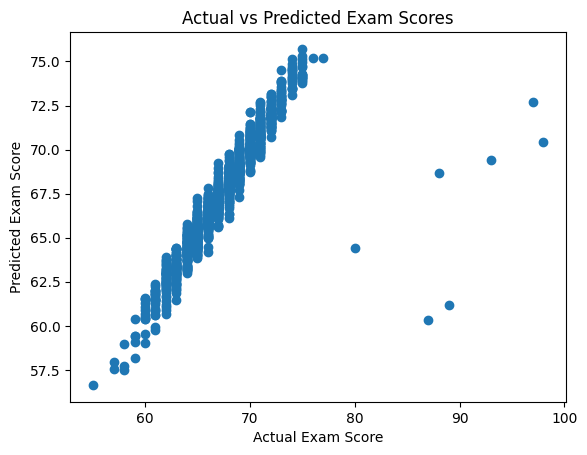

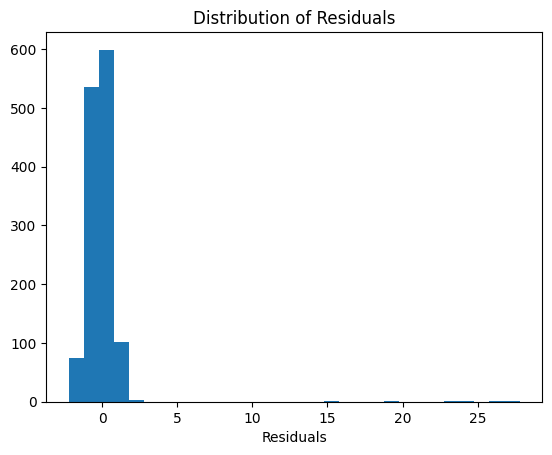

In [24]:
# Scatterplot: Actual vs Predicted Exam Scores
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

# Calculate residuals (errors between actual and predicted values)
residuals = y_test - y_pred

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()